In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
forbes = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

## 1. Ознакомление с данными

In [58]:
forbes

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [59]:
# Количество строк и столбцов
print('______________________________________')
rows, cols = forbes.shape
print(f"\nКоличество строк: {rows}, столбцов: {cols}")
print('______________________________________')

# Первые и последние 5 строк
print("\nПервые 5 строк:")
print(forbes.head())
print('______________________________________')
print("\nПоследние 5 строк:")
print(forbes.tail())
print('______________________________________')

# Определение типов признаков
numerical_cols = forbes.select_dtypes(include=np.number).columns.tolist()
categorical_cols = forbes.select_dtypes(exclude=np.number).columns.tolist()
print(f"\nКатегориальные признаки: {categorical_cols}")
print('______________________________________')
print(f"\nЧисловые признаки: {numerical_cols}")
print('______________________________________')

# Размер датафрейма в МБ
memory = forbes.memory_usage(deep=True).sum() / (1024**2)
print(f"\nРазмер датафрейма: {memory:.2f} МБ")

______________________________________

Количество строк: 301, столбцов: 8
______________________________________

Первые 5 строк:
   S.NO               Name Nationality  Current Rank Previous Year Rank  \
0     1         Mike Tyson         USA             1                NaN   
1     2     Buster Douglas         USA             2                NaN   
2     3  Sugar Ray Leonard         USA             3                NaN   
3     4       Ayrton Senna      Brazil             4                NaN   
4     5        Alain Prost      France             5                NaN   

         Sport  Year  earnings ($ million)  
0       boxing  1990                  28.6  
1       boxing  1990                  26.0  
2       boxing  1990                  13.0  
3  auto racing  1990                  10.0  
4  auto racing  1990                   9.0  
______________________________________

Последние 5 строк:
     S.NO           Name Nationality  Current Rank Previous Year Rank  \
296   297  Steph

## 2. Разведочный анализ

In [60]:
# Для числовых переменных
print("\nАнализ числовых переменных:")
print('______________________________________')
for col in numerical_cols:
    print(f"\nПеременная: {col}")
    print(f"Доля пропусков: {forbes[col].isnull().mean():.2%}")
    print(f"Мин: {forbes[col].min()}, Макс: {forbes[col].max()}")
    print(f"Среднее: {forbes[col].mean():.2f}")
    print(f"Медиана: {forbes[col].median():.2f}")
    print(f"Дисперсия: {forbes[col].var():.2f}")
    q75, q25 = np.percentile(forbes[col], [75, 25])
    print(f"IQR: {q75 - q25:.2f}")
    # Проверка на выбросы (правило 1.5*IQR)
    lower_bound = q25 - 1.5*(q75 - q25)
    upper_bound = q75 + 1.5*(q75 - q25)
    outliers = forbes[(forbes[col] < lower_bound) | (forbes[col] > upper_bound)]
    print(f"Выбросы: {'Да' if not outliers.empty else 'Нет'}")
    print('______________________________________')


Анализ числовых переменных:
______________________________________

Переменная: S.NO
Доля пропусков: 0.00%
Мин: 1, Макс: 301
Среднее: 151.00
Медиана: 151.00
Дисперсия: 7575.17
IQR: 150.00
Выбросы: Нет
______________________________________

Переменная: Current Rank
Доля пропусков: 0.00%
Мин: 1, Макс: 10
Среднее: 5.45
Медиана: 5.00
Дисперсия: 8.13
IQR: 5.00
Выбросы: Нет
______________________________________

Переменная: Year
Доля пропусков: 0.00%
Мин: 1990, Макс: 2020
Среднее: 2005.12
Медиана: 2005.00
Дисперсия: 82.15
IQR: 16.00
Выбросы: Нет
______________________________________

Переменная: earnings ($ million)
Доля пропусков: 0.00%
Мин: 8.1, Макс: 300.0
Среднее: 45.52
Медиана: 39.00
Дисперсия: 1123.95
IQR: 35.40
Выбросы: Да
______________________________________


In [61]:
# Для категориальных переменных
print("\nАнализ категориальных переменных:")
print('______________________________________')
for col in categorical_cols:
    print(f"\nПеременная: {col}")
    print(f"Доля пропусков: {forbes[col].isnull().mean():.2%}")
    print(f"Уникальных значений: {forbes[col].nunique()}")
    # Проверка на аномалии (например, редкие категории)
    freq = forbes[col].value_counts(normalize=True)
    outliers = freq[freq < 0.01]  # Категории с частотой <1%
    print(f"Выбросы: {'Да' if not outliers.empty else 'Нет'}")
    print('______________________________________')


Анализ категориальных переменных:
______________________________________

Переменная: Name
Доля пропусков: 0.00%
Уникальных значений: 82
Выбросы: Да
______________________________________

Переменная: Nationality
Доля пропусков: 0.00%
Уникальных значений: 22
Выбросы: Да
______________________________________

Переменная: Previous Year Rank
Доля пропусков: 7.97%
Уникальных значений: 36
Выбросы: Да
______________________________________

Переменная: Sport
Доля пропусков: 0.00%
Уникальных значений: 29
Выбросы: Да
______________________________________


## 3. Визуализация

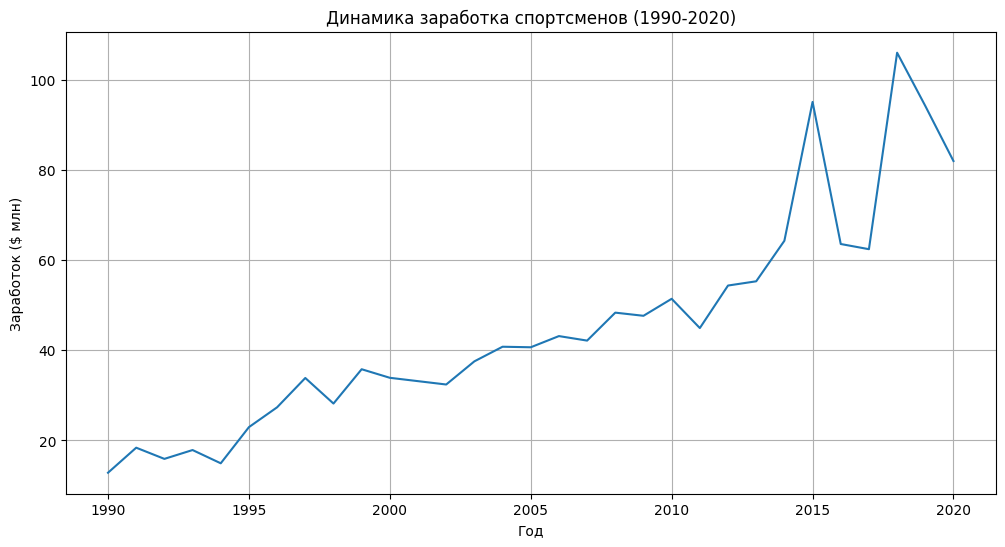

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='earnings ($ million)', data=forbes, errorbar=None)
plt.title('Динамика заработка спортсменов (1990-2020)')
plt.xlabel('Год')
plt.ylabel('Заработок ($ млн)')
plt.grid(True)
plt.show()

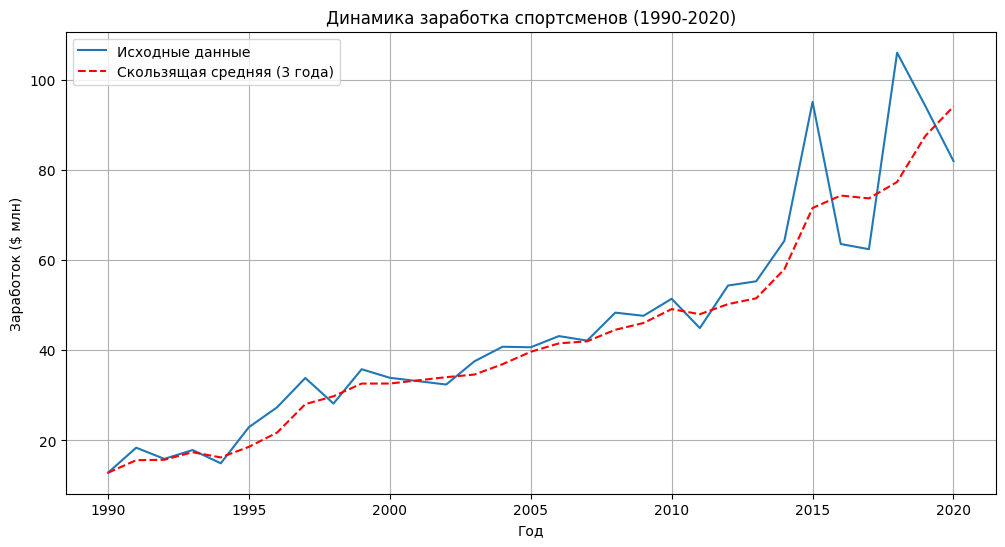

In [63]:
plt.figure(figsize=(12, 6))

# Создаем агрегированный DataFrame по годам (на случай нескольких записей за год)
yearly_data = forbes.groupby('Year', as_index=False)['earnings ($ million)'].mean()

# Исходные данные
sns.lineplot(x='Year', y='earnings ($ million)', data=yearly_data,
             errorbar=None, label='Исходные данные')

# Скользящая средняя с окном в 3 года
yearly_data['rolling_mean'] = yearly_data['earnings ($ million)'].rolling(window=3, min_periods=1).mean()
sns.lineplot(x='Year', y='rolling_mean', data=yearly_data,
             linestyle='--', color='red', label='Скользящая средняя (3 года)')

plt.title('Динамика заработка спортсменов (1990-2020)')
plt.xlabel('Год')
plt.ylabel('Заработок ($ млн)')
plt.legend()
plt.grid(True)
plt.show()

Судя по графику, с течением времени зарплаты сильно росли.
Основные периоды изменения роста:
- 1995 - рост начался более бурно, скорее всего произошло измение или обновление в индустрии.
- 2013 - рост достиг своих пиков, скорее всего драйвером послужили потоковые трансляции игр.

## 4. Проверка гипотез:

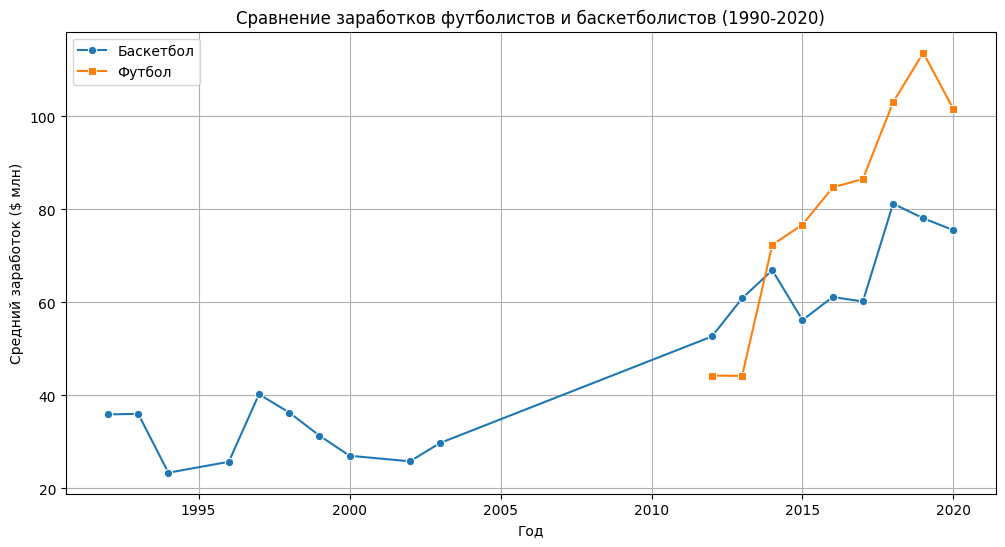

In [64]:
# Гипотеза 1: Заработок баскетболистов выше, чем футболистов
from scipy.stats import ttest_ind

# Фильтрация данных
basketball = forbes[forbes['Sport'] == 'Basketball']
soccer = forbes[forbes['Sport'] == 'Soccer']

# Агрегация по годам (средний заработок)
basketball_yearly = basketball.groupby('Year')['earnings ($ million)'].mean().reset_index()
soccer_yearly = soccer.groupby('Year')['earnings ($ million)'].mean().reset_index()

# Построение графиков
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='earnings ($ million)', data=basketball_yearly,
             label='Баскетбол', marker='o', errorbar=None)
sns.lineplot(x='Year', y='earnings ($ million)', data=soccer_yearly,
             label='Футбол', marker='s', errorbar=None)

plt.title('Сравнение заработков футболистов и баскетболистов (1990-2020)')
plt.xlabel('Год')
plt.ylabel('Средний заработок ($ млн)')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Гипотеза 1: Заработок баскетболистов выше, чем футболистов
from scipy.stats import ttest_ind

basketball = forbes[forbes['Sport'] == 'Basketball']['earnings ($ million)']
soccer = forbes[forbes['Sport'] == 'Soccer']['earnings ($ million)']
t_stat, p_value = ttest_ind(basketball, soccer, nan_policy='omit')
print(f"\nГипотеза 1: p-value = {p_value:.4f}")
print("Вывод: Заработки значимо различаются." if p_value < 0.05 else "Нет значимых различий.")



Гипотеза 1: p-value = 0.0000
Вывод: Заработки значимо различаются.


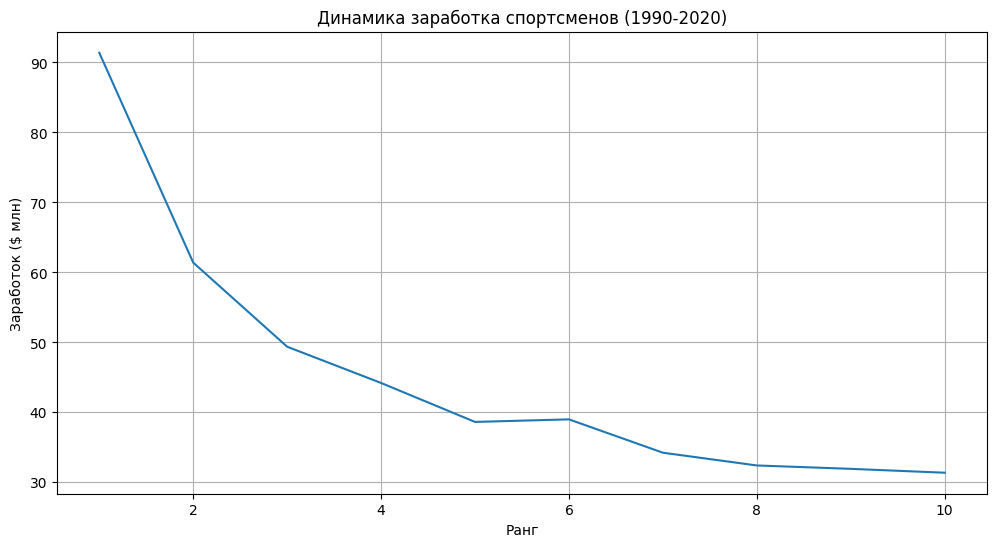

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Current Rank', y='earnings ($ million)', data=forbes, errorbar=None)
plt.title('Динамика заработка спортсменов (1990-2020)')
plt.xlabel('Ранг')
plt.ylabel('Заработок ($ млн)')
plt.grid(True)
plt.show()

In [47]:
# Гипотеза 2: Корреляция между текущим рейтингом и заработком
corr = forbes['Current Rank'].corr(forbes['earnings ($ million)'])
print(f"\nГипотеза 2: Корреляция = {corr:.2f}")
print("Вывод: Чем лучше ранг (ниже его значение), тем выше заработок." if corr < 0 else "Нет прямой связи.")


Гипотеза 2: Корреляция = -0.45
Вывод: Чем лучше ранг (ниже его значение), тем выше заработок.


Судя по значению корреляции, кажется, что заработок линейно зависит от ранга игрока, но если взглянуть на график, то видно, что зависимость нелинейная.

Оптимальная степень полинома: 3 (R² = -1.62)


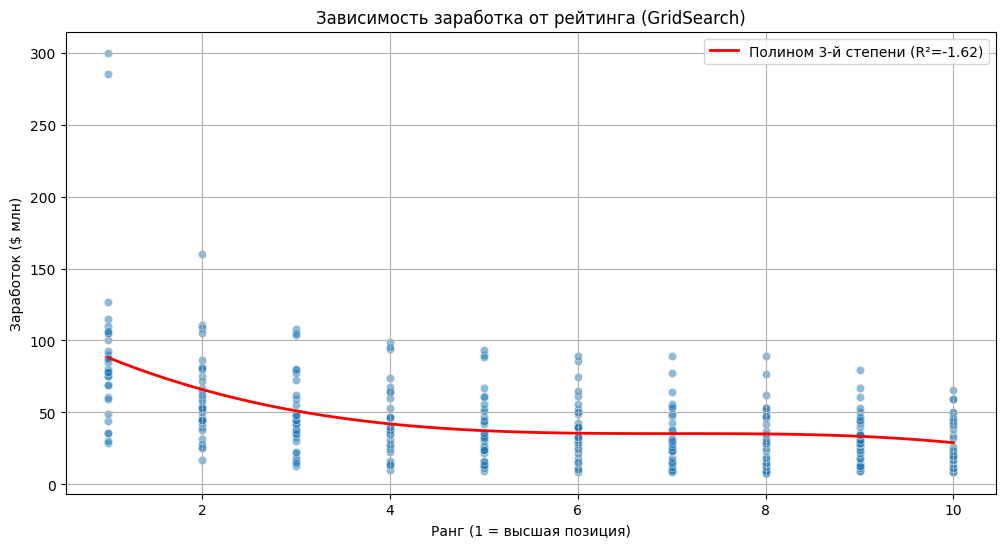

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Подготовка данных
X = forbes[['Current Rank']].values
y = forbes['earnings ($ million)'].values

# Создание конвейера: полиномиальные признаки + линейная регрессия
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

# Сетка параметров: степени от 1 до 10
param_grid = {'poly__degree': list(range(1, 11))}

# GridSearch с кросс-валидацией (5 фолдов)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Обучение модели
grid_search.fit(X, y)

# Лучшая степень и результат
best_degree = grid_search.best_params_['poly__degree']
best_score = grid_search.best_score_
print(f"Оптимальная степень полинома: {best_degree} (R² = {best_score:.2f})")

# Визуализация
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Current Rank', y='earnings ($ million)', data=forbes, alpha=0.5)

# Предсказания лучшей модели
x_plot = np.linspace(1, 10, 100).reshape(-1, 1)
y_plot = grid_search.predict(x_plot)

plt.plot(x_plot, y_plot, color='red', lw=2,
         label=f'Полином {best_degree}-й степени (R²={best_score:.2f})')
plt.title('Зависимость заработка от рейтинга (GridSearch)')
plt.xlabel('Ранг (1 = высшая позиция)')
plt.ylabel('Заработок ($ млн)')
plt.legend()
plt.grid(True)
plt.show()